In [173]:
import pandas as pd
import numpy as np

In [174]:
df=pd.read_csv('income.csv')

In [175]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Pre processing

In [176]:
from sklearn.preprocessing import MinMaxScaler #importing library for scalling pre processing
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

# Data visualization 

Text(0, 0.5, 'Income($)')

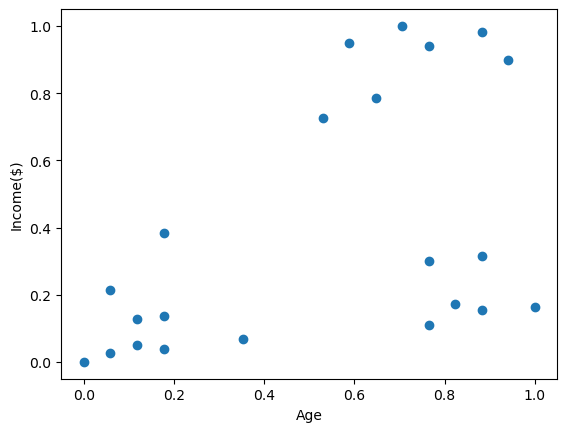

In [177]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],[df['Income($)']])
plt.xlabel('Age')
plt.ylabel('Income($)')

# Finding K-Value for clustering using Elbow method

In [178]:
from sklearn.cluster import KMeans #importing library KMeans operation.

In [179]:
sse=[] #storing sum of square error in array
k_rng=range(1, 10)
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    sse

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

Text(0, 0.5, 'sse')

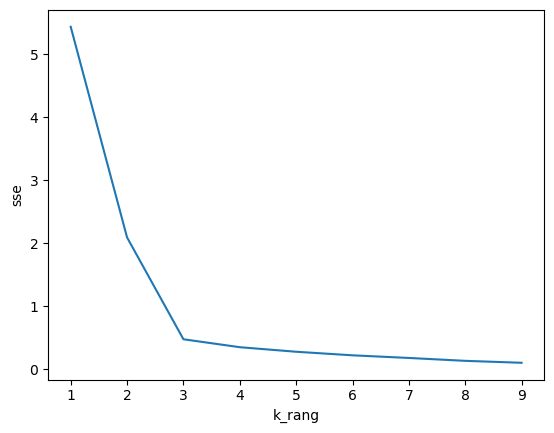

In [180]:
plt.plot(k_rng,sse)
plt.xlabel('k_rang')
plt.ylabel('sse')
#from the plot we can find the value of K=3 by elbow method

# Trained our model

In [191]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict #our model is trained and it makes 3 clusters for the given data set

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [192]:
df['cluster']=y_predict # viewing the data in dataframe.
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [193]:
# Assuming you have already trained your KMeans model and assigned it to the variable 'kmeans'
new_data_point = [[28, 60000]]

# Predict the cluster for the new data point
cluster_label = km.predict(new_data_point)
cluster_label


/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)